<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/simple_mnist_convnet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

Example from: https://keras.io/examples/vision/mnist_convnet/

In [16]:
# Import the required packages:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Shape of the training data: {}".format(x_train.shape))
print("Shape of the testing data: {}".format(x_test.shape))

# Get the first image of the dataset:
first_img = x_train[0]
print("Shape of each image: {}".format(first_img.shape))

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("Showing the class of the first sample: {}".format(y_test[0]))

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Shape of the training data: (60000, 28, 28)
Shape of the testing data: (10000, 28, 28)
Shape of each image: (28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Showing the class of the first sample: 7


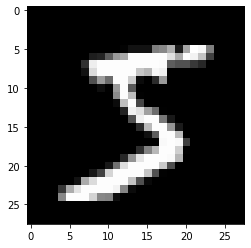

In [26]:
import matplotlib.pyplot as plt

# Show the first image:
plt.imshow(first_img, cmap="gray")

[Why Use a One Hot Encoding?](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/) 

In [19]:
print("(After to_categorical: Showing the class of the first sample: {}, with dim {}".format(y_test[0,:], y_test.shape))

(After to_categorical: Showing the class of the first sample: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], with dim (10000, 10)


In [14]:
print(y_test.shape)

(10000, 10)


In [15]:
print(y_test[0,:])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 34s 10ms/step - loss: 0.7797 - accuracy: 0.7666 - val_loss: 0.0817 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1210 - accuracy: 0.9632 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0875 - accuracy: 0.9726 - val_loss: 0.0463 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0700 - accuracy: 0.9781 - val_loss: 0.0413 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0369 - val_accuracy: 0.9907
Epoch 6/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0378 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0336 - val_accuracy: 0.9907
Epoc

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026234246790409088
Test accuracy: 0.9909999966621399
